## Analisis Faktor

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from tabulate import tabulate

In [3]:
df = pd.read_excel("../data/pca_data.xlsx")
df.head()

,Unnamed: 0,trip_id,trip_datetime_tugas,trip_datetime_selesai,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,trip_kode,trip_pickup,beh_peta_potensi,...,trip_start_cat,trip_end_cat,trip_start_pagi,trip_start_siang,trip_start_sore,trip_end_pagi,trip_end_siang,trip_end_sore,loc_jumlah_sekolah,sosdem_jumlah_kendaraan
0,0,28898,2023-05-08 07:30:00,2023-05-08 07:49:00,4.35,8800.0,150.0,145,Kebon Pisang,3,...,pagi,pagi,True,False,False,True,False,False,7,1.0
1,1,28897,2023-05-08 07:49:00,2023-05-08 08:27:00,12.36,24800.0,150.0,133,Pungkur,3,...,pagi,pagi,True,False,False,True,False,False,7,1.0
2,2,28896,2023-05-08 08:53:00,2023-05-08 09:05:00,3.21,8000.0,150.0,111,Lingkar Selatan,3,...,pagi,pagi,True,False,False,True,False,False,11,1.0
3,3,28890,2023-05-08 19:13:00,2023-05-08 19:29:00,2.77,13600.0,150.0,86,Hegarmanah,3,...,sore,sore,False,False,True,False,False,True,5,1.0
4,4,28889,2023-05-08 19:39:00,2023-05-08 19:56:00,5.92,16400.0,150.0,79,Arjuna,3,...,sore,sore,False,False,True,False,False,True,9,1.0


In [52]:
df.columns

Index(['trip_id', 'trip_datetime_tugas', 'trip_datetime_selesai', 'trip_jarak',
       'trip_pendapatan_bersih', 'trip_poin_tambahan', 'trip_kode',
       'trip_pickup', 'beh_peta_potensi', 'sosdem_usia', 'sosdem_jk',
       'sosdem_pendidikan_terakhir', 'sosdem_jumlah_motor',
       'sosdem_jumlah_mobil', 'sosdem_anggota_rt', 'sosdem_posisi_rt',
       'sosdem_penghasilan_pribadi', 'sosdem_penghasilan_keluarga',
       'sosdem_pekerjaan_selain', 'beh_platform', 'beh_rata_jam_online',
       'beh_status_kendaraan', 'beh_lama_driver', 'beh_ojek_konvensional',
       'loc_jumlah_pasar', 'loc_jumlah_pt', 'loc_jumlah_halte',
       'loc_jumlah_stasiun', 'loc_jumlah_terminal', 'loc_jumlah_hotel',
       'loc_jumlah_mall', 'loc_jumlah_ofm', 'loc_jumlah_pickup',
       'loc_jumlah_dropoff', 'loc_populasi', 'loc_jml_b_permukiman',
       'loc_jumlah_taman', 'loc_jumlah_kantor', 'loc_avg_duration',
       'trip_lamanya_waktu_pesanan', 'sosdem_status_nikah_Menikah',
       'trip_jenis_pesanan_Fo

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,trip_id,trip_datetime_tugas,trip_datetime_selesai,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,trip_kode,trip_pickup,beh_peta_potensi,sosdem_usia,...,trip_start_cat,trip_end_cat,trip_start_pagi,trip_start_siang,trip_start_sore,trip_end_pagi,trip_end_siang,trip_end_sore,loc_jumlah_sekolah,sosdem_jumlah_kendaraan
0,28898,2023-05-08 07:30:00,2023-05-08 07:49:00,4.35,8800.0,150.0,145,Kebon Pisang,3,34,...,pagi,pagi,True,False,False,True,False,False,7,1.0
1,28897,2023-05-08 07:49:00,2023-05-08 08:27:00,12.36,24800.0,150.0,133,Pungkur,3,34,...,pagi,pagi,True,False,False,True,False,False,7,1.0
2,28896,2023-05-08 08:53:00,2023-05-08 09:05:00,3.21,8000.0,150.0,111,Lingkar Selatan,3,34,...,pagi,pagi,True,False,False,True,False,False,11,1.0
3,28890,2023-05-08 19:13:00,2023-05-08 19:29:00,2.77,13600.0,150.0,86,Hegarmanah,3,34,...,sore,sore,False,False,True,False,False,True,5,1.0
4,28889,2023-05-08 19:39:00,2023-05-08 19:56:00,5.92,16400.0,150.0,79,Arjuna,3,34,...,sore,sore,False,False,True,False,False,True,9,1.0


In [57]:
df_pca = df[[
    'trip_start_pagi',
    'trip_start_siang',
    'trip_start_sore',
    'beh_peta_potensi',
    'sosdem_usia',
    'sosdem_anggota_rt',
    'sosdem_penghasilan_pribadi',
    'beh_platform',
    'beh_rata_jam_online',
    'beh_lama_driver',
    'loc_jumlah_pasar',
    'loc_jumlah_sekolah',
    'loc_jumlah_pt',
    'loc_jumlah_halte',
    'loc_jumlah_stasiun',
    'loc_jumlah_terminal',
    'loc_jumlah_hotel',
    'loc_jumlah_mall',
    'loc_jumlah_ofm',
    'loc_jumlah_pickup',
    'loc_populasi',
    'loc_jml_b_permukiman',
    'loc_jumlah_taman',
    'loc_jumlah_kantor',
    'trip_jenis_pesanan_Food',
    'trip_jenis_pesanan_Kurir Barang',
    'trip_jenis_pesanan_Ride',
    'jumlah_faskes',
]]
df_pca.head()

,trip_start_pagi,trip_start_siang,trip_start_sore,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,...,loc_jumlah_ofm,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes
0,True,False,False,3,34,4,3499999.5,False,9,4,...,66,625,13297,1014,0,6,False,False,True,2
1,True,False,False,3,34,4,3499999.5,False,9,4,...,16,128,7522,1328,0,4,False,False,True,0
2,True,False,False,3,34,4,3499999.5,False,9,4,...,44,147,10254,1419,0,15,False,False,True,1
3,False,False,True,3,34,4,3499999.5,False,9,4,...,68,262,20196,2186,1,10,True,False,False,3
4,False,False,True,3,34,4,3499999.5,False,9,4,...,32,245,13023,2232,0,2,False,True,False,1


In [58]:
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_correlation_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_covariance_matrix(data, title):
    covariance_matrix = data.cov()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_covariance_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()


In [59]:
def perform_factor_analysis(data, n_factors, rotate=None, num_loadings=None):
    # Create factor analysis object and perform factor analysis
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotate)
    fa.fit(data)

    factor_loadings = fa.loadings_
    communalities = fa.get_communalities()
    # eigenvalues, _ = fa.get_eigenvalues()

    # Create a DataFrame to hold the factor loadings
    feature_names = data.columns.tolist()
    factor_loadings_df = pd.DataFrame(
        np.column_stack((factor_loadings, communalities)),
        index=feature_names,
        columns=[f'F{i + 1}' for i in range(factor_loadings.shape[1])] + ['Communalities']
    )

    # Sort the factor loadings by the highest loading
    sorted_loadings = factor_loadings_df.sort_values(by='Communalities', ascending=False)

    # Store the factor loadings in a DataFrame
    factor_loadings_output = sorted_loadings.head(num_loadings) if num_loadings is not None else sorted_loadings

    # Get SS loadings, proportion variance, and cumulative variance
    ss_loadings, proportion_var, cumulative_var = fa.get_factor_variance()

    # Store the calculated values in DataFrames
    ss_loadings_df = pd.DataFrame({'SS Loadings': ss_loadings})
    proportion_var_df = pd.DataFrame({'Proportion Var': proportion_var})
    cumulative_var_df = pd.DataFrame({'Cumulative Var': cumulative_var})

    # Print the factor loadings with the specified number of loadings
    if num_loadings is not None:
        print("Sorted factor loadings (pattern matrix) based upon communalities")
        print(factor_loadings_output.to_string())
    else:
        print("Sorted factor loadings (pattern matrix) based upon communalities")
        print(sorted_loadings.to_string())

    # Print the calculated values
    print("\nSS loadings")
    print(ss_loadings_df.to_string(index=False))

    print("\nProportion Var")
    print(proportion_var_df.to_string(index=False))

    print("\nCumulative Var")
    print(cumulative_var_df.to_string(index=False))

    print("\nCumulative Proportion")
    print(cumulative_var_df.to_string(index=False))

    # Return the DataFrames for further analysis or visualization
    return factor_loadings_output, ss_loadings_df, proportion_var_df, cumulative_var_df


Standarisasi data

In [60]:
feature_names = df_pca.columns.tolist()
scaler = StandardScaler()
df_pca_std = pd.DataFrame(scaler.fit_transform(df_pca), columns=feature_names)

df_pca_std

,trip_start_pagi,trip_start_siang,trip_start_sore,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,...,loc_jumlah_ofm,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes
0,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.006350,-0.137928,-0.504846,-0.902197,-0.649870,...,0.009720,0.074201,-0.235276,-0.644068,-0.663855,-0.345961,-0.934173,-0.430732,1.284253,-0.07373
1,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.006350,-0.137928,-0.504846,-0.902197,-0.649870,...,-1.125216,-0.818071,-0.873831,-0.492371,-0.663855,-0.635311,-0.934173,-0.430732,1.284253,-1.22181
2,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.006350,-0.137928,-0.504846,-0.902197,-0.649870,...,-0.489652,-0.783960,-0.571748,-0.448408,-0.663855,0.956114,-0.934173,-0.430732,1.284253,-0.64777
3,-0.543016,-0.9467,1.528837,-0.088364,-0.384722,-0.006350,-0.137928,-0.504846,-0.902197,-0.649870,...,0.055117,-0.577499,0.527562,-0.077861,-0.007766,0.232739,1.070465,-0.430732,-0.778663,0.50031
4,-0.543016,-0.9467,1.528837,-0.088364,-0.384722,-0.006350,-0.137928,-0.504846,-0.902197,-0.649870,...,-0.762037,-0.608019,-0.265573,-0.055638,-0.663855,-0.924661,-0.934173,2.321627,-0.778663,-0.64777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,-0.543016,-0.9467,1.528837,-0.762157,-0.025685,-0.006350,3.655883,-0.504846,0.654225,0.441261,...,2.211495,2.492489,-1.456215,-0.733444,1.304413,1.390139,-0.934173,-0.430732,1.284253,2.22243
24412,-0.543016,-0.9467,1.528837,-1.435950,1.769502,-0.006350,-0.137928,-0.504846,0.654225,0.441261,...,-0.830133,-0.857568,2.603999,1.729942,-0.663855,-0.201286,1.070465,-0.430732,-0.778663,-0.64777
24413,-0.543016,-0.9467,1.528837,-1.435950,1.769502,-0.006350,-0.137928,-0.504846,0.654225,0.441261,...,-0.898229,-0.787550,0.590146,0.307178,-0.663855,-1.069336,1.070465,-0.430732,-0.778663,-0.07373
24414,-0.543016,-0.9467,1.528837,-1.435950,1.769502,-0.006350,-0.137928,-0.504846,0.654225,0.441261,...,0.758777,-0.913222,0.731125,-0.072064,-0.663855,0.088064,-0.934173,-0.430732,1.284253,1.07435


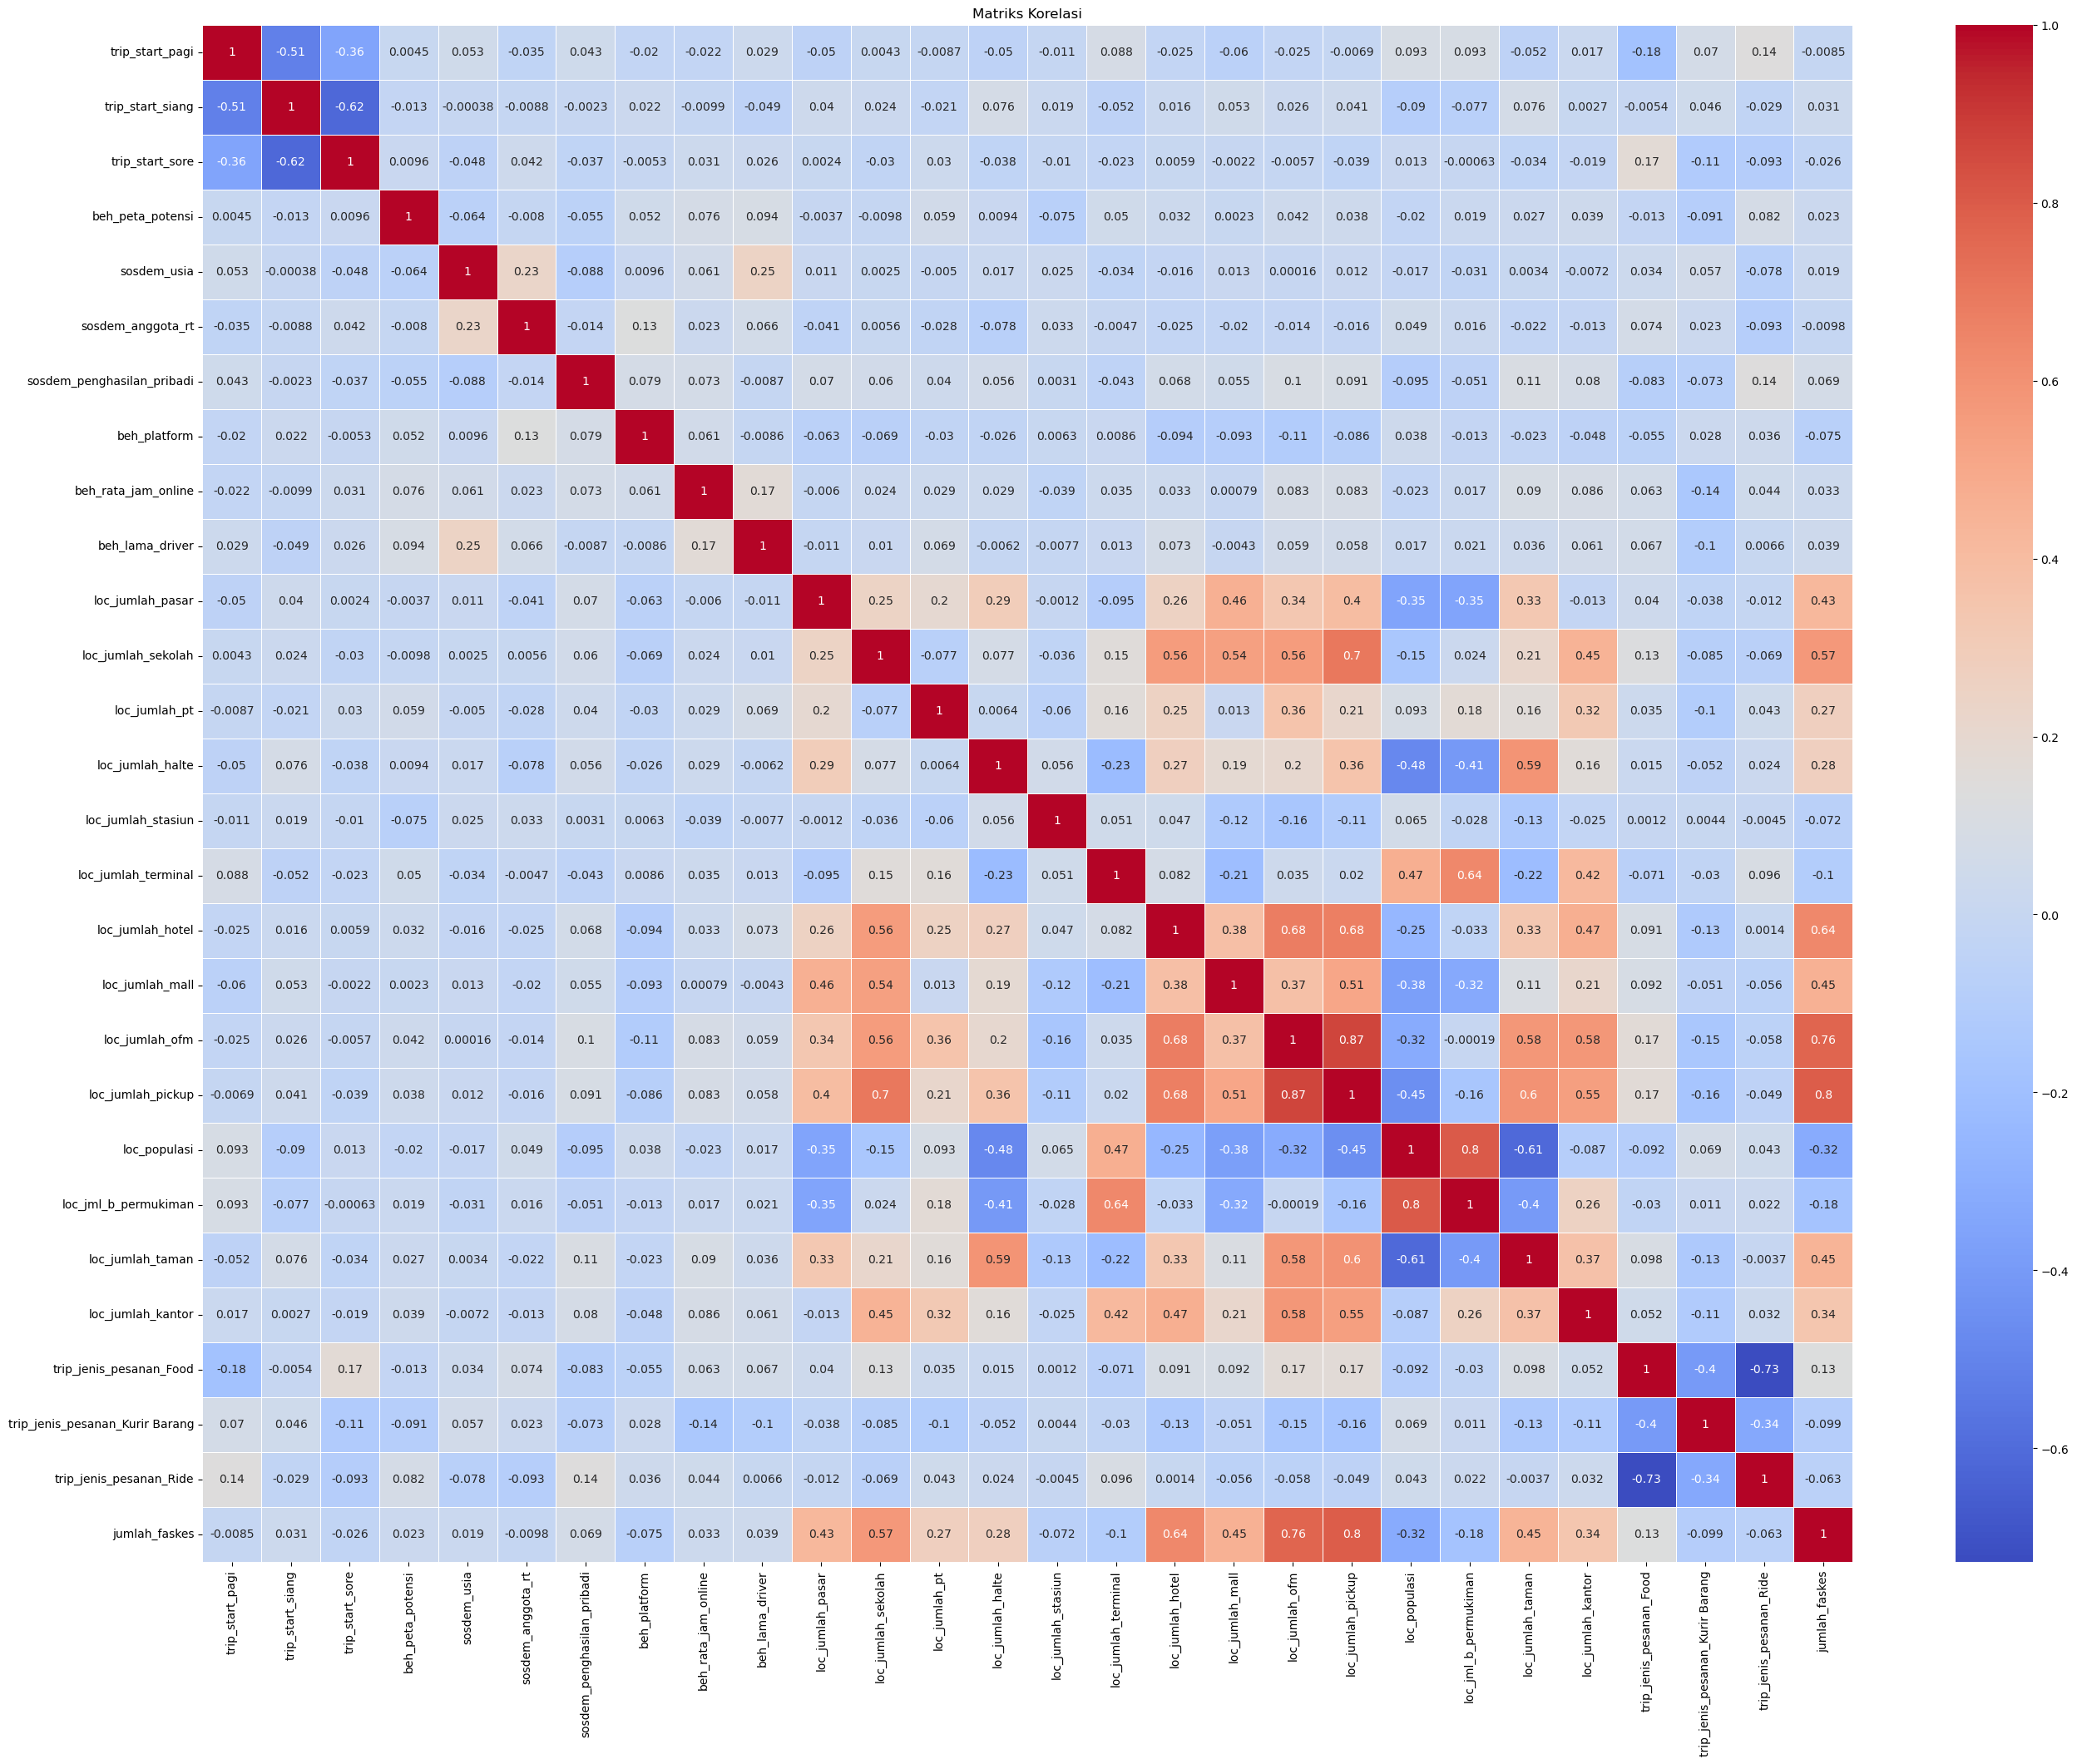

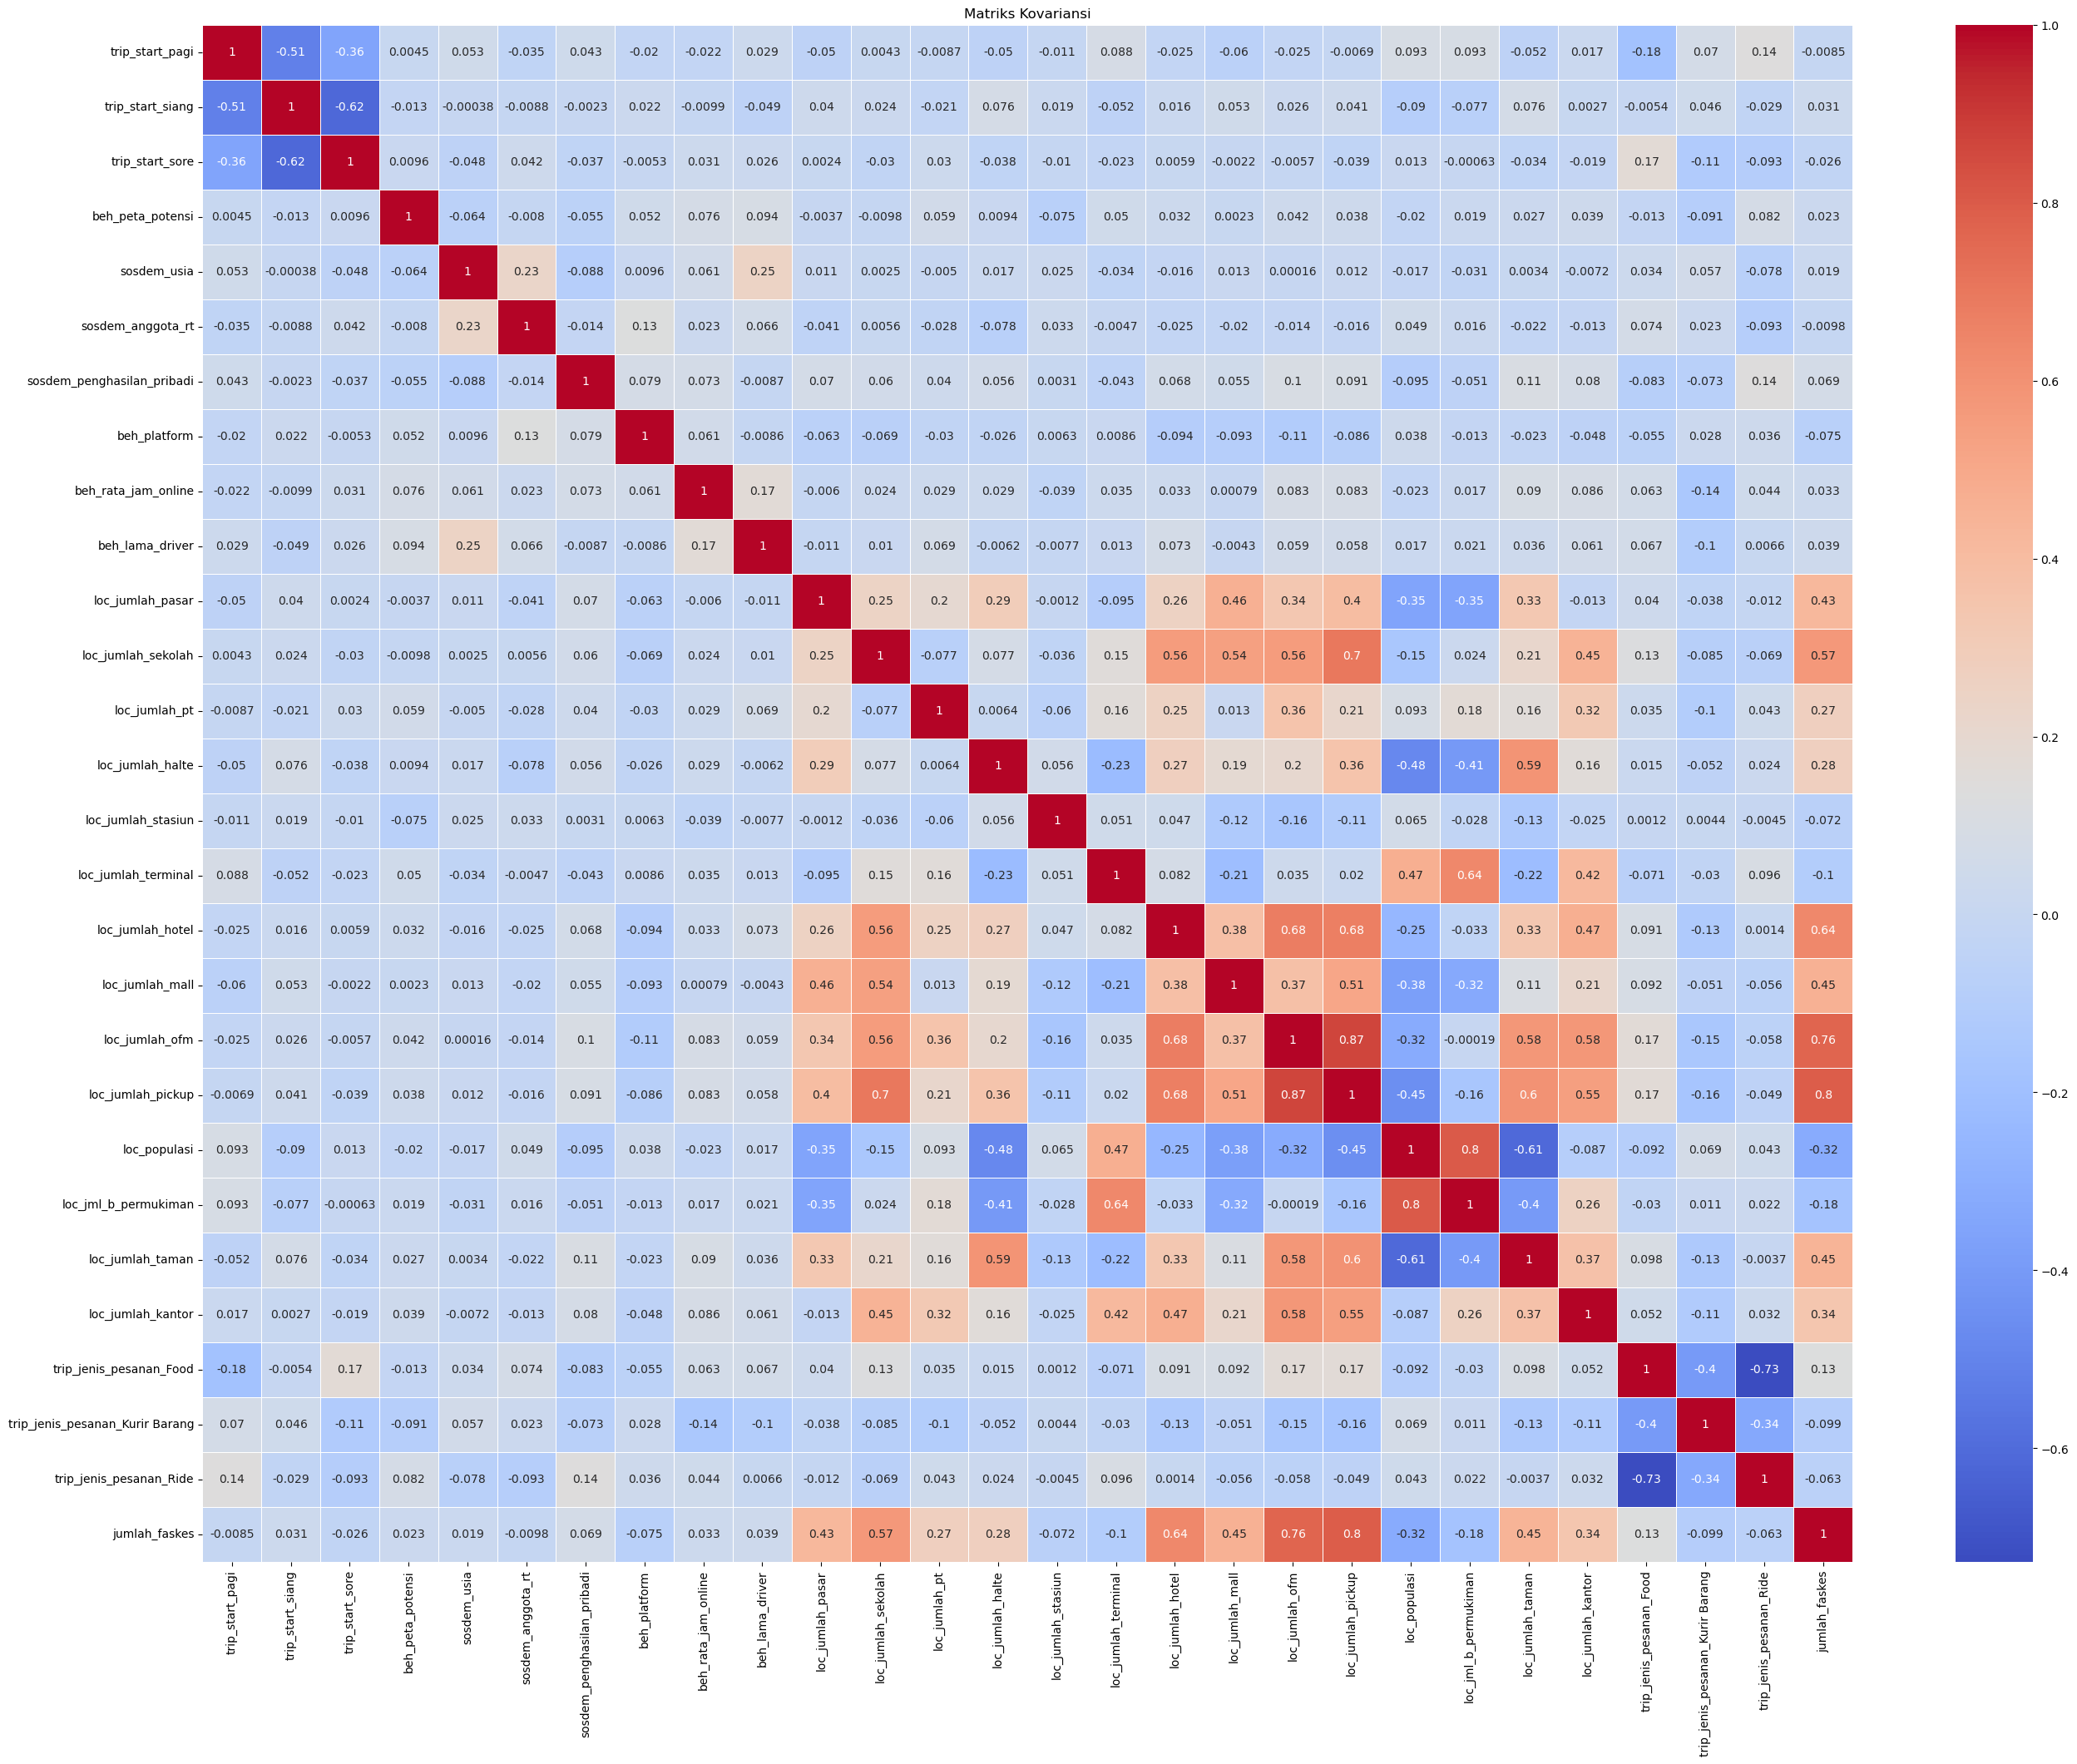

In [61]:
# Create heatmap for correlation matrix
plot_correlation_matrix(df_pca_std, "Matriks Korelasi")

# Create heatmap for covariance matrix
plot_covariance_matrix(df_pca_std, "Matriks Kovariansi")

In [62]:
threshold = 0.8
high_correlation_pairs = []
covariance_matrix = df_pca_std.cov()

for i in range(len(covariance_matrix.columns)):
    for j in range(i + 1, len(covariance_matrix.columns)):
        if abs(covariance_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((covariance_matrix.columns[i], covariance_matrix.columns[j]))

In [63]:
high_correlation_pairs

[('loc_jumlah_ofm', 'loc_jumlah_pickup'),
 ('loc_populasi', 'loc_jml_b_permukiman')]

##### Tes Kecukupan (Adequacy Test)
Tes kecukupan pada analisis faktor ini bisa dilakukan dengan beberapa cara. Pada analisis ini dilakukan dengan 2 cara yaitu dengan Tes Bartlett dan Tes Kaiser-Meyer-Olkin (KMO).

* Tes Bartlett <br>
Tes ini dilakukan untuk mengetahui apakah matriks korelasi seluruh variabel dengan matriks identitas. Apabila matriks tersebut mirip dengan matriks identitas, maka semua variabel memiliki korelasi yang buruk. Tes Bartlett menghasilkan suatu p-value yang menunjukkan apakah perbedaan dengan matriks identitas signifikan atau tidak.

In [64]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_std)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: nan
p-value: nan


/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


Nilai p-value yang dihasilkan lebih kecil dari 0.05. Hal tersebut menunjukkan bahwa tes ini signifikan secara statistik dan perbedaan dari chi-square yang rendah.

* Kaiser-Meyer-Olkin <br>
Tes KMO ini digunakan untuk`kelayakan atau kecukupan sampel data dengan mengestimasi proporsi variansi dari seluruh variabel. Nilai KMO ini memiliki rentang 0 hingga 1 dengan nilai dibawah 0.6 menunjukkan data kurang layak.

In [65]:
kmo_all,kmo_model=calculate_kmo(df_pca_std)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.6605688995890044


/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


##### Analisis Faktor
Jumlah faktor bisa dipilih melalui kriteria Kaisere dengan visualisasi screeplot nilai eigenvalues.

In [66]:
df_pca_std.shape

(24416, 28)

In [67]:
df_pca_std.head()

,trip_start_pagi,trip_start_siang,trip_start_sore,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,...,loc_jumlah_ofm,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes
0,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.00635,-0.137928,-0.504846,-0.902197,-0.64987,...,0.009720,0.074201,-0.235276,-0.644068,-0.663855,-0.345961,-0.934173,-0.430732,1.284253,-0.07373
1,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.00635,-0.137928,-0.504846,-0.902197,-0.64987,...,-1.125216,-0.818071,-0.873831,-0.492371,-0.663855,-0.635311,-0.934173,-0.430732,1.284253,-1.22181
2,1.841566,-0.9467,-0.654092,-0.088364,-0.384722,-0.00635,-0.137928,-0.504846,-0.902197,-0.64987,...,-0.489652,-0.783960,-0.571748,-0.448408,-0.663855,0.956114,-0.934173,-0.430732,1.284253,-0.64777
3,-0.543016,-0.9467,1.528837,-0.088364,-0.384722,-0.00635,-0.137928,-0.504846,-0.902197,-0.64987,...,0.055117,-0.577499,0.527562,-0.077861,-0.007766,0.232739,1.070465,-0.430732,-0.778663,0.50031
4,-0.543016,-0.9467,1.528837,-0.088364,-0.384722,-0.00635,-0.137928,-0.504846,-0.902197,-0.64987,...,-0.762037,-0.608019,-0.265573,-0.055638,-0.663855,-0.924661,-0.934173,2.321627,-0.778663,-0.64777


In [68]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df_pca_std)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.58876975e+00, 2.86503806e+00, 1.97105027e+00, 1.68178025e+00,
       1.52274533e+00, 1.43370787e+00, 1.23284381e+00, 1.15544324e+00,
       1.12617156e+00, 1.10372659e+00, 1.02495049e+00, 9.70182585e-01,
       9.17253556e-01, 8.13775469e-01, 7.74062226e-01, 7.22951932e-01,
       6.34746170e-01, 5.89181950e-01, 5.17049294e-01, 3.80592560e-01,
       2.69464188e-01, 2.37005527e-01, 1.78130539e-01, 1.29718553e-01,
       8.96028097e-02, 6.99889901e-02, 6.64176397e-05, 4.42911877e-16])

Melihat dalam bentuk screeplot.

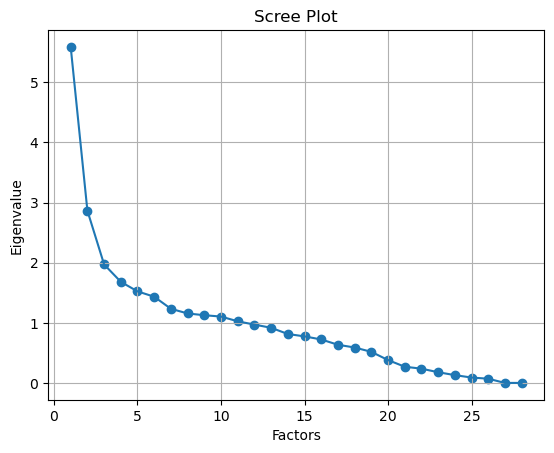

In [69]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_pca_std.shape[1]+1),ev)
plt.plot(range(1,df_pca_std.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Berdasarkan aturan Kaiser, jumlah faktor yang digunakan adalah 15 faktor karena ada 15 faktor yang memiliki eigenvalue lebih dari 1. Hal ini menandakan bahwa seluruh variabel memiliki korelasi yang tinggi dan merepresentasikan faktor yang sama. Setelah itu, kembali melakukan analisis faktor dengan jumlah faktor yang sudah ditentukan.

* Tidak rotate

In [77]:
factor_loadings_output, ss_loadings_df, proportion_var_df, cumulative_var_df = perform_factor_analysis(df_pca_std, 11)

Sorted factor loadings (pattern matrix) based upon communalities
                                       F1        F2        F3        F4        F5        F6        F7        F8        F9       F10       F11  Communalities
trip_jenis_pesanan_Food          0.217651 -0.036474 -0.855152  0.117876 -0.053128  0.339243 -0.276747  0.010450 -0.107325  0.040921  0.016207       1.001944
trip_jenis_pesanan_Ride         -0.072811  0.123103  0.776291 -0.310149 -0.443803 -0.193195 -0.188934  0.002386  0.086485 -0.042758  0.009091       0.998653
trip_start_siang                 0.083513 -0.206340  0.176556  0.909604 -0.288320 -0.039514 -0.050296  0.027751  0.024255 -0.011625 -0.010080       0.996917
trip_start_sore                 -0.018576  0.029347 -0.544006 -0.634059 -0.211572 -0.411013  0.275700 -0.066507  0.053383 -0.020213  0.006954       0.996613
trip_start_pagi                 -0.079131  0.213591  0.384068 -0.390257  0.574362  0.496023 -0.241291  0.039613 -0.087190  0.035920  0.004404       0.

In [78]:
factor_loadings_output

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,Communalities
trip_jenis_pesanan_Food,0.217651,-0.036474,-0.855152,0.117876,-0.053128,0.339243,-0.276747,0.010450,-0.107325,0.040921,0.016207,1.001944
trip_jenis_pesanan_Ride,-0.072811,0.123103,0.776291,-0.310149,-0.443803,-0.193195,-0.188934,0.002386,0.086485,-0.042758,0.009091,0.998653
trip_start_siang,0.083513,-0.206340,0.176556,0.909604,-0.288320,-0.039514,-0.050296,0.027751,0.024255,-0.011625,-0.010080,0.996917
trip_start_sore,-0.018576,0.029347,-0.544006,-0.634059,-0.211572,-0.411013,0.275700,-0.066507,0.053383,-0.020213,0.006954,0.996613
trip_start_pagi,-0.079131,0.213591,0.384068,-0.390257,0.574362,0.496023,-0.241291,0.039613,-0.087190,0.035920,0.004404,0.996325
loc_jumlah_kantor,0.542549,0.569402,0.057313,0.066450,-0.104769,0.099613,0.189110,-0.331785,0.013227,0.388472,-0.080596,0.950603
trip_jenis_pesanan_Kurir Barang,-0.199486,-0.111728,0.134404,0.243356,0.638553,-0.198056,0.599421,-0.016327,0.029403,0.000833,-0.030679,0.937919
loc_jumlah_pickup,0.932875,0.163657,0.024400,0.010703,0.062925,-0.008790,-0.014875,-0.059798,0.013743,-0.139256,-0.018767,0.925516
loc_jumlah_mall,0.604602,-0.145780,-0.012913,0.012644,0.254589,-0.431164,-0.331593,0.166072,0.030907,0.339859,-0.155622,0.916052
loc_jumlah_ofm,0.853707,0.290104,-0.011268,0.017939,-0.005913,0.049497,0.108423,0.084400,-0.014512,-0.197017,-0.096116,0.883054


In [79]:
# Fungsi untuk menampilkan variabel dengan faktor loadings tertinggi
def top_loaded_variables(factor_name, n=5):
    sorted_df = factor_loadings_output[factor_name].sort_values(ascending=False)
    top_n = sorted_df.head(n)
    return top_n

In [81]:
top_variables_list = []  # List untuk menyimpan variabel teratas

# Loop melalui faktor F1 hingga F11 dan simpan variabel teratas dalam list
for factor_number in range(1, 12):
    factor_name = 'F' + str(factor_number)
    top_variable = top_loaded_variables(factor_name)
    top_variables_list.append(top_variable)

# Menampilkan list variabel teratas
print("\nTop Loaded Variables List:")
for variable in top_variables_list:
    print(variable)


Top Loaded Variables List:
loc_jumlah_pickup    0.932875
loc_jumlah_ofm       0.853707
jumlah_faskes        0.806065
loc_jumlah_hotel     0.694663
loc_jumlah_taman     0.685720
Name: F1, dtype: float64
loc_jml_b_permukiman    0.846260
loc_jumlah_terminal     0.673731
loc_populasi            0.623690
loc_jumlah_kantor       0.569402
loc_jumlah_pt           0.351449
Name: F2, dtype: float64
trip_jenis_pesanan_Ride            0.776291
trip_start_pagi                    0.384068
trip_start_siang                   0.176556
trip_jenis_pesanan_Kurir Barang    0.134404
sosdem_penghasilan_pribadi         0.133164
Name: F3, dtype: float64
trip_start_siang                   0.909604
trip_jenis_pesanan_Kurir Barang    0.243356
loc_jml_b_permukiman               0.149928
trip_jenis_pesanan_Food            0.117876
loc_populasi                       0.111210
Name: F4, dtype: float64
trip_jenis_pesanan_Kurir Barang    0.638553
trip_start_pagi                    0.574362
loc_jumlah_mall              

Variabel terpilih:
* loc_jumlah_pickup    
* loc_jumlah_ofm  
* loc_jumlah_faskes          
* loc_jumlah_taman
* loc_jumlah_hotel
* loc_jml_b_permukiman
* loc_jumlah_terminal
* loc_populasi
* trip_start_siang
* trip_jenis_pesanan_Ride
* trip_jenis_pesanan_Kurir Barang
* loc_jumlah_pasar
* sosdem_usia

### Bikin dataset MNL fix

In [74]:
df.head()

,trip_id,trip_datetime_tugas,trip_datetime_selesai,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,trip_kode,trip_pickup,beh_peta_potensi,sosdem_usia,...,trip_start_cat,trip_end_cat,trip_start_pagi,trip_start_siang,trip_start_sore,trip_end_pagi,trip_end_siang,trip_end_sore,loc_jumlah_sekolah,sosdem_jumlah_kendaraan
0,28898,2023-05-08 07:30:00,2023-05-08 07:49:00,4.35,8800.0,150.0,145,Kebon Pisang,3,34,...,pagi,pagi,True,False,False,True,False,False,7,1.0
1,28897,2023-05-08 07:49:00,2023-05-08 08:27:00,12.36,24800.0,150.0,133,Pungkur,3,34,...,pagi,pagi,True,False,False,True,False,False,7,1.0
2,28896,2023-05-08 08:53:00,2023-05-08 09:05:00,3.21,8000.0,150.0,111,Lingkar Selatan,3,34,...,pagi,pagi,True,False,False,True,False,False,11,1.0
3,28890,2023-05-08 19:13:00,2023-05-08 19:29:00,2.77,13600.0,150.0,86,Hegarmanah,3,34,...,sore,sore,False,False,True,False,False,True,5,1.0
4,28889,2023-05-08 19:39:00,2023-05-08 19:56:00,5.92,16400.0,150.0,79,Arjuna,3,34,...,sore,sore,False,False,True,False,False,True,9,1.0


In [82]:
for_mnl = df[[
    'loc_jumlah_pickup',
    'loc_jumlah_ofm',
    'jumlah_faskes',
    'loc_jumlah_taman',
    'loc_jumlah_hotel',
    'loc_jml_b_permukiman',
    'loc_jumlah_terminal',
    'loc_populasi',
    'trip_start_siang',
    'trip_jenis_pesanan_Ride',
    'trip_jenis_pesanan_Kurir Barang',
    'loc_jumlah_pasar',
    'sosdem_usia',
    'trip_pickup'
]]

In [83]:
for_mnl.to_excel("../data/Data_MNL_final.xlsx")